In [64]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 1000)
import numpy as np
import random

from textblob import TextBlob

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='poster', style='white', font_scale=2)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
def sentiment_analysis(clean_df):
    
    pol = []
    sub=[]
    for doc in clean_df['body']:
        sentp = TextBlob(doc).sentiment.polarity
        sents = TextBlob(doc).sentiment.subjectivity
        pol.append(sentp)
        sub.append(sents)  

    #sentdf = pd.DataFrame()
    #sentdf['polarity'] = pol
    #sentdf['subjectivity'] = sub
       
    clean_df['polarity'] = pol
    clean_df['subjectivity'] = sub
    
    return clean_df

In [4]:
df_clean = pd.read_pickle('prepro/df_clean.pkl')

In [5]:
df_clean.head()

,body,drug,experience,title,bodyweight,age,gender,year,views,exp_id
0,fresh from my second experience with lsd and s...,LSD,Glowing_Experiences,Confronting the Blur,64.0,21.0,M,2011.0,9126.0,92657.0
1,first a little background i am not your typi...,LSD,Glowing_Experiences,Captain Acid Hat's Amazing Acid Aventure,180.0,NaN,M,2008.0,22859.0,74690.0
2,to say that i have tasted the purity of reason...,LSD,Glowing_Experiences,Abriendo Los Ojos,175.0,NaN,M,2006.0,13184.0,59616.0
3,the year was the year of my very first a...,LSD,Glowing_Experiences,"Asunder, the End of Cities, the Rise of Drago",170.0,NaN,M,1999.0,15035.0,60279.0
4,after a very mild and unexciting acid experien...,LSD,Glowing_Experiences,Unexplainable Beauty,115.0,NaN,F,2006.0,25874.0,57959.0


In [6]:
df_sentiment = sentiment_analysis(df_clean)

In [7]:
df_sentiment.head()

,body,drug,experience,title,bodyweight,age,gender,year,views,exp_id,polarity,subjectivity
0,fresh from my second experience with lsd and s...,LSD,Glowing_Experiences,Confronting the Blur,64.0,21.0,M,2011.0,9126.0,92657.0,0.091788,0.517182
1,first a little background i am not your typi...,LSD,Glowing_Experiences,Captain Acid Hat's Amazing Acid Aventure,180.0,NaN,M,2008.0,22859.0,74690.0,0.126231,0.495407
2,to say that i have tasted the purity of reason...,LSD,Glowing_Experiences,Abriendo Los Ojos,175.0,NaN,M,2006.0,13184.0,59616.0,0.173614,0.516131
3,the year was the year of my very first a...,LSD,Glowing_Experiences,"Asunder, the End of Cities, the Rise of Drago",170.0,NaN,M,1999.0,15035.0,60279.0,0.053549,0.544519
4,after a very mild and unexciting acid experien...,LSD,Glowing_Experiences,Unexplainable Beauty,115.0,NaN,F,2006.0,25874.0,57959.0,0.114897,0.558893


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

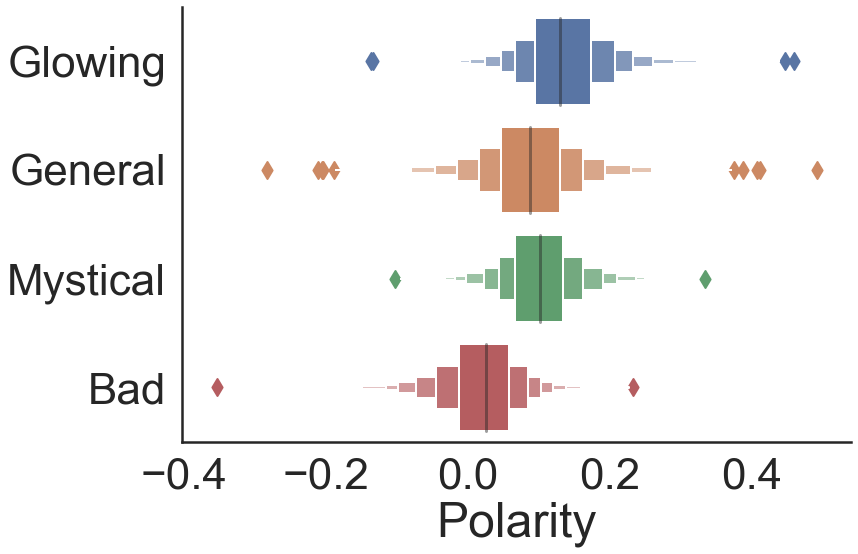

In [67]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxenplot(x='polarity', y='experience', data=df_sentiment, )
sns.despine()
ax.set_ylabel('')
ax.set_yticklabels(['Glowing', 'General', 'Mystical', 'Bad'])
ax.set_xlabel('Polarity')
plt.savefig('figs/polarity_by_exp_type.png', bbox_inches='tight')

In [56]:
ord_by_median = df_sentiment.groupby('drug').median().sort_values(by='polarity', ascending=False).index.to_list()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

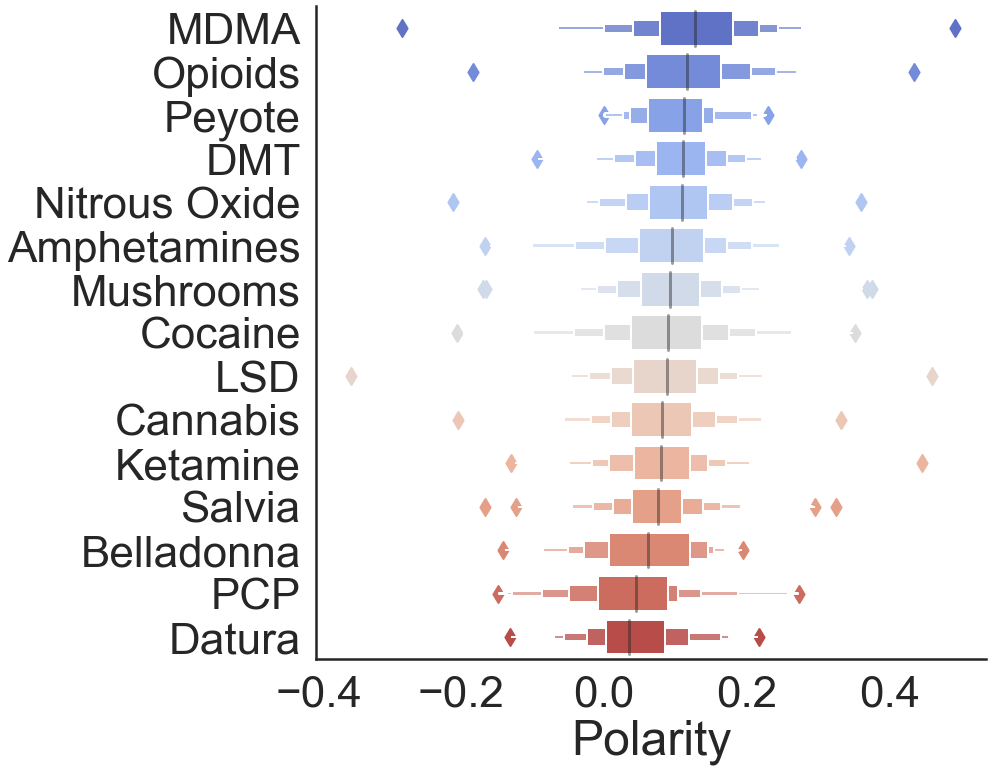

In [66]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.boxenplot(x='polarity', y='drug', data=df_sentiment, palette='coolwarm', order=ord_by_median)
sns.despine()
ax.set_ylabel('')
ax.set_xlabel('Polarity')
plt.savefig('figs/polarity_by_drug.png', bbox_inches='tight')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0.5, 0, 'Age')

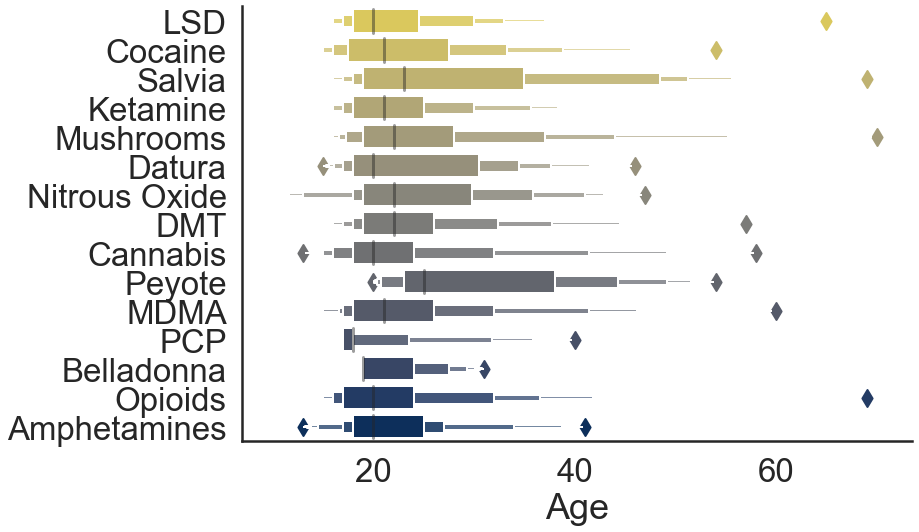

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxenplot(x='age', y='drug', data=df_sentiment, palette='cividis_r')
sns.despine()
ax.set_ylabel('')
ax.set_xlabel('Age')

In [44]:
df_sentiment[df_sentiment['polarity'] == df_sentiment['polarity'].max()]

,body,drug,experience,title,bodyweight,age,gender,year,views,exp_id,polarity,subjectivity
44,i wrote a poem about my experience on mdma at a rave who knows i just took it about hours ago this endless bliss it s like everything is beautiful and i am innocent it s as though all is joy and i can feel the being of others the being of myself the being of the world and all it s people and everything is close to me and beautiful and i am innocent and i am happy bliss of bliss this endless bliss this perfect state of being this comes from a pill this endless bliss,MDMA,General,Endless Bliss (poem),NaN,NaN,M,2001.0,7244.0,9967.0,0.4925,0.785


In [45]:
df_sentiment.loc[df_sentiment['exp_id']==9967, 'body']

44    i wrote a poem about my experience on mdma at a rave  who knows  i just took it about    hours ago    this endless bliss     it s like everything is beautiful   and i am innocent     it s as though all is joy   and i can feel         the being of others  the being of myself    the being of the world and all it s people  and everything is close to me    and beautiful and    i am innocent and i am happy   bliss of bliss this endless bliss this perfect state of being  this comes from a pill        this endless bliss    
Name: body, dtype: object